In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import ntpath
import os

def which_metrics(traintracks_root):
    return {os.path.splitext(f.stem)[0] for f in (Path(traintracks_root) / 'metrics').glob('**/*')}
    
def read_df(metric_name, traintracks_root):
    files = (Path(traintracks_root) / 'metrics').glob('**/*')
    metric_files = [f for f in files if metric_name in ntpath.basename(f)]
    
    ret = pd.DataFrame()
    
    for f in metric_files:
        data = pd.read_json(f, lines=True)
        ret = ret.append(data, ignore_index = True)
    
    return ret.sort_values(by=ret.columns[0])

def moving_average(a, n=10):
    n = min(n, len(a))
    ret = np.cumsum(np.array(a), dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    normalizer = np.concatenate([np.arange(n) + 1, np.ones(len(a) - n) * n])
    return ret / normalizer

def plot_list(df, metric_name, x_axis, last_n=None):
    y_data = df[metric_name].values
    x_data = df[x_axis].values

    if last_n:
        y_data = y_data[-last_n:]
        x_data = x_data[-last_n:]
         
    # plt.figure(figsize=(8, 5))
    
    i = 0
    for ys in y_data:
        xs = (x_data[i],) * len(ys)
        if i == 0:
            label = metric_name
        else:
            label = None
        plt.plot(xs, ys, 'o', color='C0', alpha=.5, label=label)
        i += 1
    plt.xlabel(x_axis)
    plt.legend()
    
def plot(df, metric_name, x_axis, movingavg=None, last_n=None):
    y_data = df[metric_name].values
    x_data = df[x_axis].values
    
    # plt.figure(figsize=(8, 5))
    
    if type(y_data[0]) == list:
        plot_list(df, metric_name, x_axis, last_n=last_n)
    else:
        if movingavg is not None:
            y_data = moving_average(y_data, n=movingavg)
        if last_n:
            y_data = y_data[-last_n:]
            x_data = x_data[-last_n:]

        plt.plot(x_data, y_data, label=metric_name)
        plt.xlabel(x_axis)
        plt.legend()

In [ ]:
def get_path(folder):
  root = '/content/drive/My Drive/work/devdata'
  return f'{root}/atari-traintracks/{folder}'

In [ ]:
traintracks_root = get_path('eval--06-19--6m--friday')
which_metrics(traintracks_root)

{'bellman_tests',
 'episode_rewards',
 'eval_rewards_Q_target',
 'eval_rewards_Q_training',
 'loss',
 'model_grads'}

# Q1

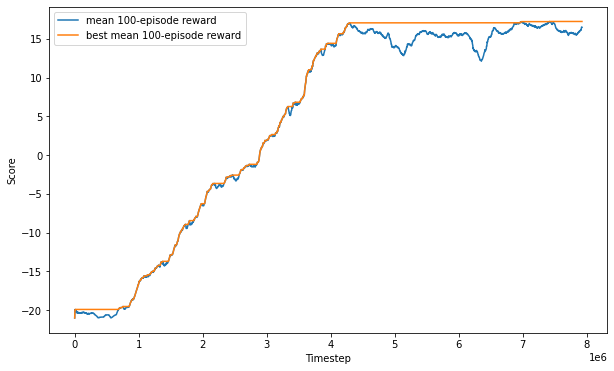

In [ ]:
df_rewards = read_df('episode_rewards', traintracks_root)
df_rewards['mean_episode_rewards'] = moving_average(df_rewards['episode_rewards'], 100)
plt.figure(figsize=(10, 6))
plt.plot(df_rewards['timestep'], df_rewards['mean_episode_rewards'], label='mean 100-episode reward');
plt.plot(df_rewards['timestep'], df_rewards['mean_episode_rewards'].cummax(), label='best mean 100-episode reward');
plt.xlabel('Timestep')
plt.ylabel('Score')
plt.legend();

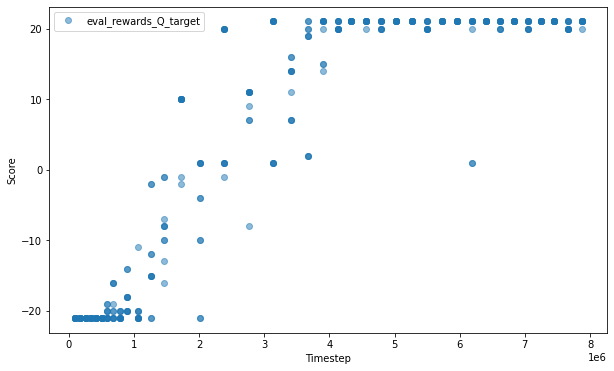

In [ ]:
df_q = read_df('eval_rewards_Q_target', traintracks_root)
plt.figure(figsize=(10, 6))
plot(df_q, 'eval_rewards_Q_target', 'timestep')
plt.xlabel('Timestep')
plt.ylabel('Score')
plt.legend();

In [ ]:
def rewards_df(name):
  df = read_df('episode_rewards', get_path(name))
  df['mean_reward'] = moving_average(df['episode_rewards'], 100)
  return df


baseline = rewards_df('eval--06-19--6m--friday')
# baseline2 = rewards_df('eval--06-23--13-23-49') # l-freq=2
sched1 = rewards_df('eval--06-30--06-09-49') # (1e6, 0.1) (2e6, 0.01)
sched2 = rewards_df('eval--06-24--06-41-07') # (0.9e6, 0.1) (1.3e6, 0.01)
sched3 = rewards_df('eval--06-28--18-14-10') # (0.5e6, 0.2) (1e6, 0.01)
t = rewards_df('eval--07-04--16-12-11') # l-freq=2
t2 = rewards_df('eval--07-05--05-26-57') # (1e6, 0.1) (1.2e6, 0.1) (1.7e6, 0.01)
t3 = rewards_df('eval--07-05--09-56-14') # (1.3e6, 0.1) (1.5e6, 0.01)

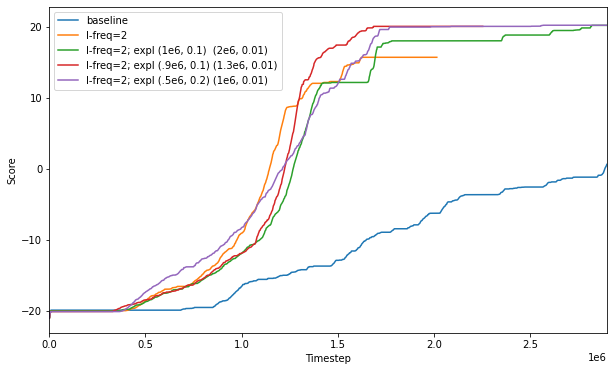

In [ ]:
plt.figure(figsize=(10, 6))

def plot_rewards(df, label):
  plt.plot(df['timestep'], df['mean_reward'].cummax(), label=label);

plot_rewards(baseline, 'baseline')
plot_rewards(t, 'l-freq=2')
# plot_rewards(baseline2, 'baseline2')
plot_rewards(sched1, 'l-freq=2; expl (1e6, 0.1)  (2e6, 0.01)')
plot_rewards(sched2, 'l-freq=2; expl (.9e6, 0.1) (1.3e6, 0.01)')
plot_rewards(sched3, 'l-freq=2; expl (.5e6, 0.2) (1e6, 0.01)')

# plot_rewards(t2, 't2')
# plot_rewards(t3, 't3')



plt.xlim((0, 2900000))

# plt.ylim((-10, 21))

plt.xlabel('Timestep')
plt.ylabel('Score')
plt.legend();

In [ ]:
1.25e6

1250000.0

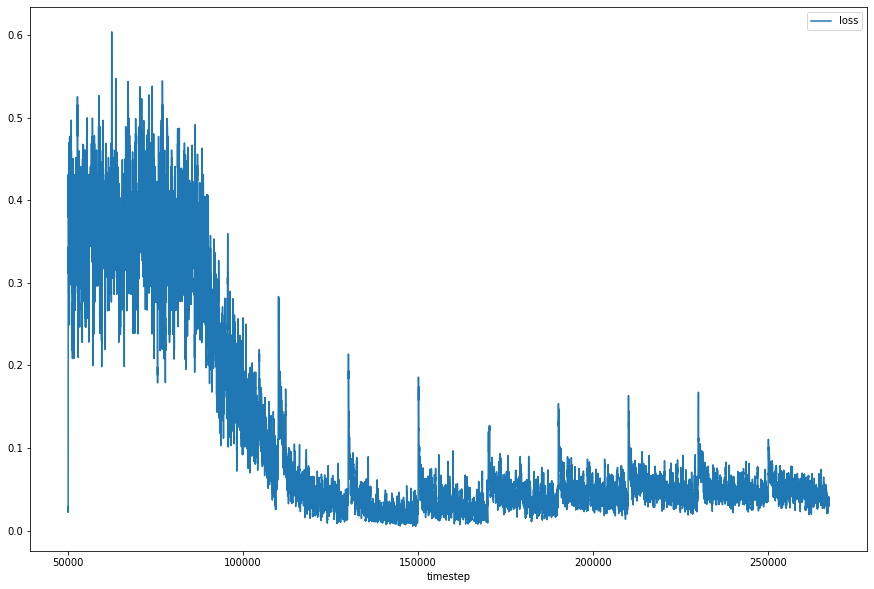

In [ ]:
df_loss = read_df('loss', traintracks_root)
plt.figure(figsize=(15, 10))
plot(df_loss, 'loss', 'timestep', movingavg=50)

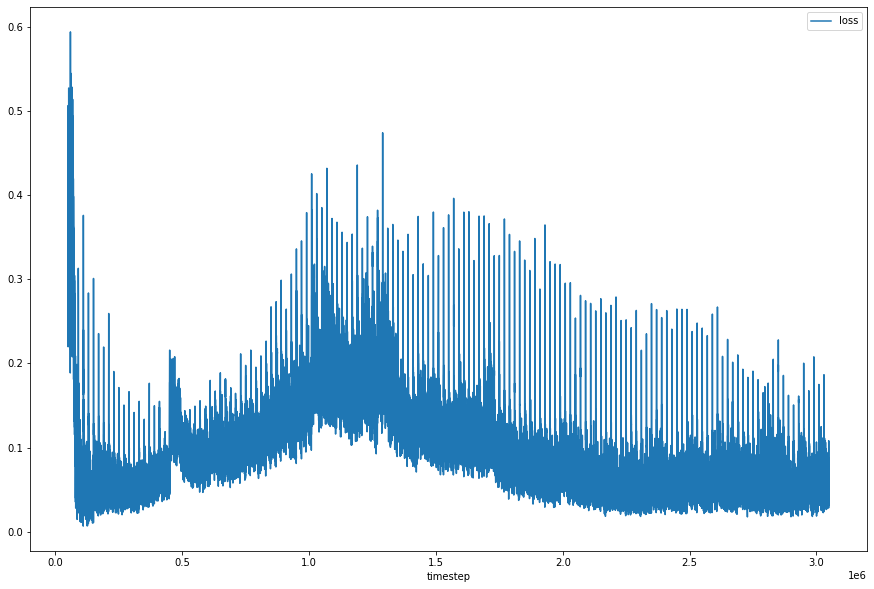

In [ ]:
df_loss = read_df('loss', traintracks_root)
plt.figure(figsize=(15, 10))
plot(df_loss.head(1500000), 'loss', 'timestep', movingavg=50)

In [ ]:
df_loss

,timestep,episode,loss
0,50003,53,0.504978
1,50005,53,0.497696
2,50007,53,0.517962
3,50009,53,0.018030
4,50011,53,0.464082
...,...,...,...
1802573,3655149,2042,0.047999
1802574,3655151,2042,0.009357
1802575,3655153,2042,0.018579
1802576,3655155,2042,0.042732


<Figure size 720x432 with 0 Axes>

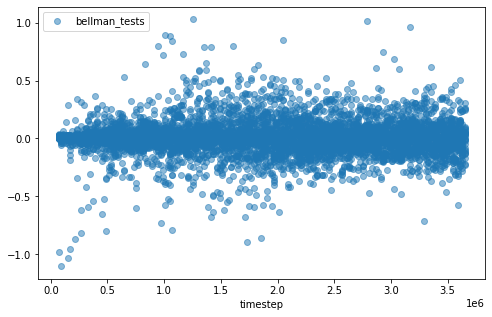

In [ ]:
df_bell = read_df('bellman_tests', traintracks_root)
plt.figure(figsize=(10, 6))
plot(df_bell, 'bellman_tests', 'timestep', movingavg=500)

(0.0, 1000000.0)

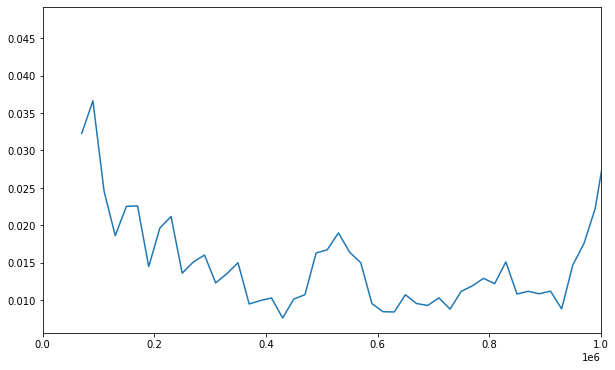

In [ ]:
bell_err = df_bell['bellman_tests'].apply(lambda x: (np.array(x)**2).mean())
plt.figure(figsize=(10, 6))
plt.plot(df_bell['timestep'], moving_average(bell_err, n=5))
plt.xlim(0, 1000000)

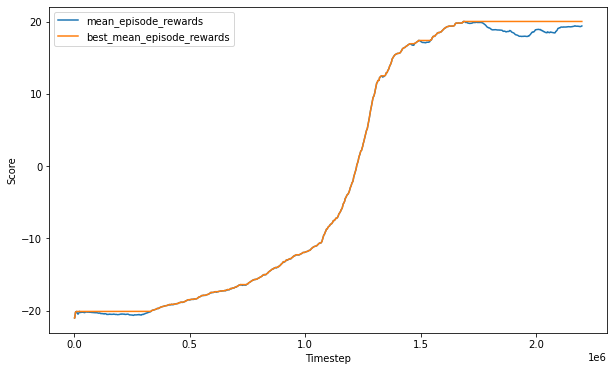

In [ ]:
# df_rewards = read_df('episode_rewards', f'{root}/atari-traintracks/eval--06-20--13-19-03')
# df_rewards = read_df('episode_rewards', f'{root}/atari-traintracks/eval--06-20--07-37-49')
df_rewards = read_df('episode_rewards', f'{root}/atari-traintracks/eval--06-24--06-41-07')

df_rewards['mean_episode_rewards'] = moving_average(df_rewards['episode_rewards'], 100)
plt.figure(figsize=(10, 6))
plt.plot(df_rewards['timestep'], df_rewards['mean_episode_rewards'], label='mean_episode_rewards');
plt.plot(df_rewards['timestep'], df_rewards['mean_episode_rewards'].cummax(), label='best_mean_episode_rewards');
plt.xlabel('Timestep')
plt.ylabel('Score')
plt.legend();

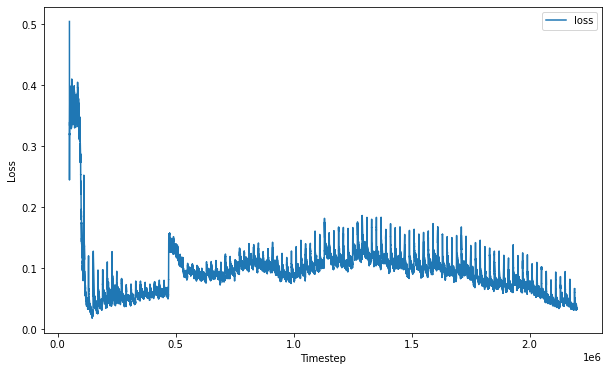

In [ ]:
df_loss = read_df('loss', f'{root}/atari-traintracks/eval--06-24--06-41-07')

# df_rewards['mean_episode_rewards'] = moving_average(df_rewards['episode_rewards'], 100)
plt.figure(figsize=(10, 6))
plt.plot(df_loss['timestep'], moving_average(df_loss['loss'], 500), label='loss');
plt.xlabel('Timestep')
plt.ylabel('Loss')
plt.legend();